In [11]:
import csv

file_path = '/home/ziczac/dev/position_control/motor_data4.csv'

rpm_right = []
rpm_left = []
position_right = []
position_left = []
timestamp = []

with open(file_path, mode='r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        rpm_right.append(float(row['RPM_Kanan']))
        rpm_left.append(float(row['RPM_Kiri']))
        position_right.append(float(row['Position_Kanan (deg)']))
        position_left.append(float(row['Position_Kiri (deg)']))
        timestamp.append(float(row['Timestamp']))

print("RPM_A:", rpm_right)
print("RPM_left:", rpm_left)
print("Position_right:", position_right)
print("Position_left:", position_left)
print("Timestamp:", timestamp)


RPM_A: [0.0, 1.0, 2.0, 6.0, 11.0, 15.0, 17.0, 18.0, 19.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 20.0, 19.0, 19.0, 19.0, 20.0, 20.0, 

In [12]:
import math
total_distance_a  = 0
total_distance_b = 0

for i in range(1, len(timestamp)):
        delta_t = (timestamp[i] - timestamp[i - 1])
        
        angular_displacement_a = rpm_a[i] * (2 * math.pi / 60) * delta_t
        angular_displacement_b = rpm_b[i] * (2 * math.pi / 60) * delta_t
        
        distance_a = angular_displacement_a * 0.05
        distance_b = angular_displacement_b * 0.05
        
        total_distance_a += distance_a
        total_distance_b += distance_b

print("Total A : " , total_distance_a, "m")
print("Total B : " , total_distance_b, "m")

Total A :  1.1160862490125547 m
Total B :  1.17290433438694 m


In [14]:
import numpy as np

def difference_angle(first, second):
    return (second - first + 180) % 360 - 180

dist_left = 0
dist_right = 0
prev_angle_left = None
prev_angle_right = None
for i in range(len(rpm_right)):
    if prev_angle_left is not None:
        d_theta_L = difference_angle(prev_angle_left, -position_right[i])
        dist_left += (np.pi * 2 * 0.05 * (d_theta_L / 360))
    prev_angle_left = -position_right[i]
    if prev_angle_right is not None:
        d_theta_R = difference_angle(prev_angle_right, position_left[i])
        dist_right += (np.pi * 2 * 0.05 * (d_theta_R / 360))
    prev_angle_right = position_left[i]

print("Total A : " , dist_left, "m")
print("Total B : " , dist_right, "m")

Total A :  1.1432933264828729 m
Total B :  1.1445253236019286 m


In [44]:
x_odom, y_odom, theta_odom = 0, 0, 0
x_store, y_store = [x_odom], [y_odom]
left_radius = 0.05
right_radius = 0.05
wheel_base = 0.265
prev_time = timestamp[0]
d_total_left = 0
d_total_right = 0

for j in range(1, len(rpm_left)):
    delta_t = (timestamp[j] - prev_time)
    prev_time = timestamp[j]

    d_left_rpm = (rpm_left[j] * 2 * math.pi * left_radius / 60) * delta_t
    d_right_rpm = ((rpm_right[j] * 2 * math.pi * right_radius / 60) * delta_t) * 1.0393461984020476
    d_distance = (d_left_rpm + d_right_rpm) / 2
    
    d_total_left += d_left_rpm
    d_total_right += d_right_rpm

    d_theta = (d_right_rpm - d_left_rpm) / wheel_base
    odom_dy = d_distance * math.cos(theta_odom + d_theta / 2)
    odom_dx = d_distance * math.sin(theta_odom + d_theta / 2)
    x_odom += odom_dx
    y_odom += odom_dy

    theta_odom = (theta_odom + d_theta) % (2 * math.pi)
    x_store.append(x_odom)
    y_store.append(y_odom)

In [45]:
d_total_left*100, d_total_right*100

(117.29043343869404, 116.00000000000009)

In [43]:
x = 1.16/1.116086249012555
x

1.0393461984020476

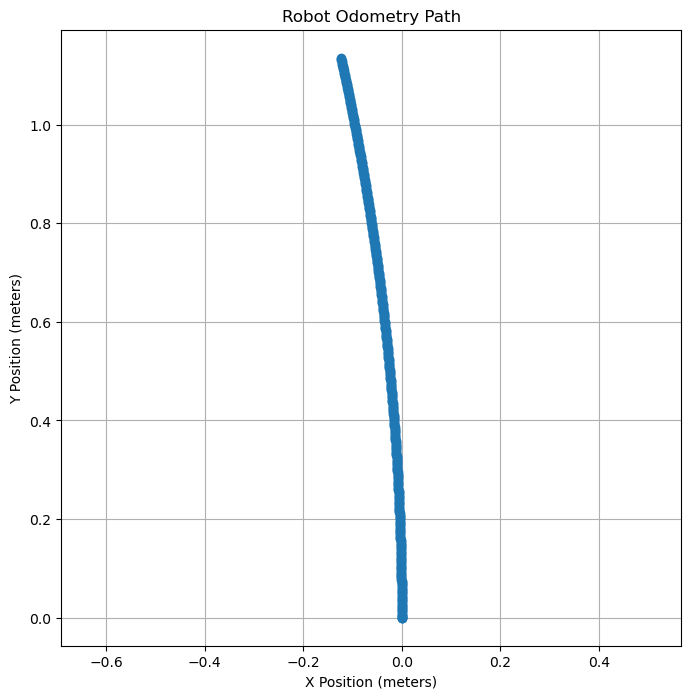

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(x_store, y_store, marker='o', linestyle='-')
plt.xlabel('X Position (meters)')
plt.ylabel('Y Position (meters)')
plt.title('Robot Odometry Path')
plt.grid(True)
plt.axis('equal')
plt.show()